<a href="https://colab.research.google.com/github/joepopp/AI/blob/main/Asteroid_MLP_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

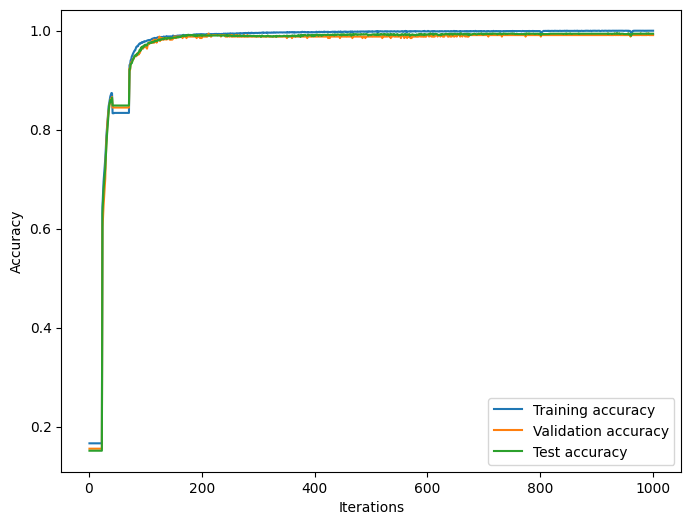

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
import pandas as pd
data = pd.read_csv('drive/MyDrive/asteroids/nasa.csv')
data = data.drop(['Neo Reference ID','Name','Close Approach Date','Orbiting Body','Orbit ID','Orbit Determination Date','Equinox'], axis=1)

# Scale the numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

X = data_scaled[:,:-1]
y = data['Hazardous'].to_numpy(dtype=np.float64)

# Split the dataset into training, validation, and testing sets -- randomly shuffle the sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

#  Split the training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Create an MLPClassifier without early stopping
mlp = MLPClassifier(hidden_layer_sizes=(4,4), max_iter=1000)

# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(1000):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


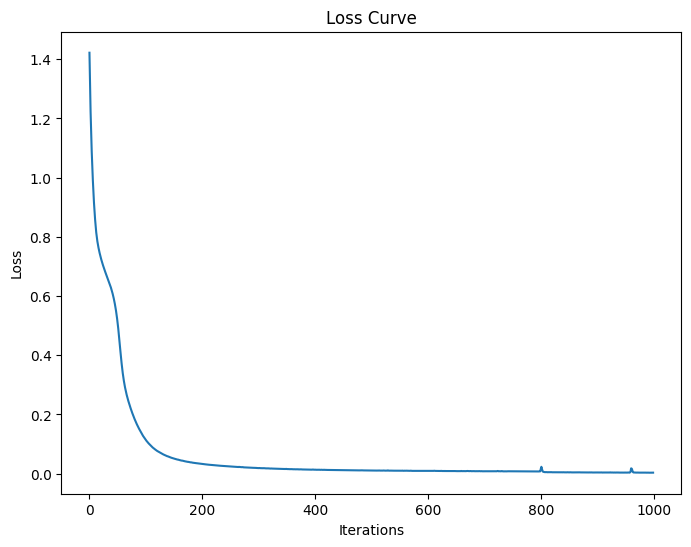

In [135]:
#@title Display the loss curve of the model

plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [136]:
#@title Information about the weights and biases of the trained model

for i, coef in enumerate(mlp.coefs_):
    print(f"Layer {i} - Weight matrix shape: {coef.shape}")

print()

for i, intercept in enumerate(mlp.intercepts_):
    print(f"Layer {i} - Intercept vector shape: {intercept.shape}")

Layer 0 - Weight matrix shape: (32, 4)
Layer 1 - Weight matrix shape: (4, 4)
Layer 2 - Weight matrix shape: (4, 1)

Layer 0 - Intercept vector shape: (4,)
Layer 1 - Intercept vector shape: (4,)
Layer 2 - Intercept vector shape: (1,)


In [137]:
#@title Calculate the overall training and test accuracies
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Overall Training Accuracy: 0.9996612466124661
Overall Test Accuracy: 0.9936034115138592


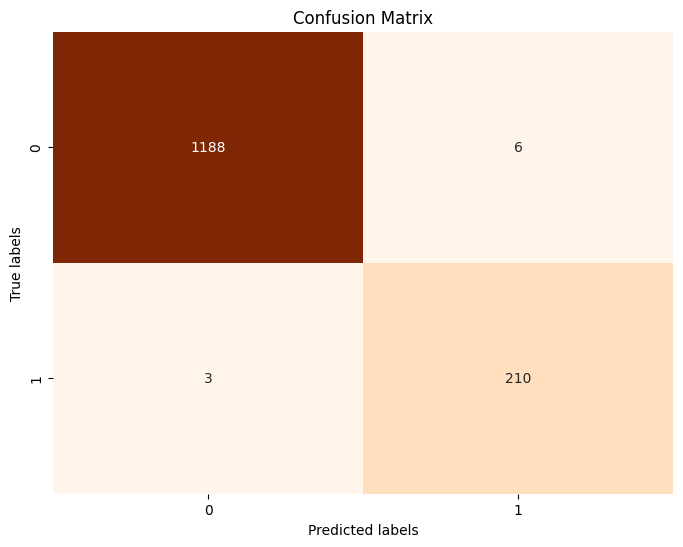

In [138]:
#@title Display the confusion matrix for the test set
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the test set
y_pred = mlp.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
